In [3]:
## Taken from detectron official repo only the detectron2 version is fixed to a certain commit for reproduceablity. 
## https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5#scrollTo=0d288Z2mF5dC
## See requirements.txt for more info

In [1]:
! pip install -r requirements.txt

  Cloning https://github.com/facebookresearch/detectron2.git (to revision bcfd464) to /tmp/pip-req-build-expdbw1g
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-expdbw1g
  Running command git checkout -q bcfd464
  Resolved https://github.com/facebookresearch/detectron2.git to commit bcfd464
  Preparing metadata (setup.py) ... done


In [4]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Mon_Apr__3_17:16:06_PDT_2023
Cuda compilation tools, release 12.1, V12.1.105
Build cuda_12.1.r12.1/compiler.32688072_0
torch:  1.12 ; cuda:  cu113
detectron2: 0.6


In [10]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

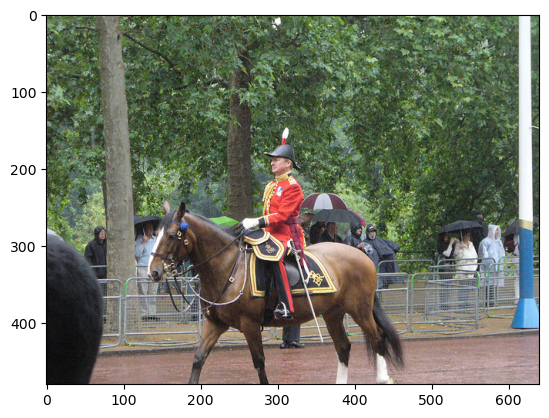

In [12]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
plt.imshow(im[...,::-1])

In [13]:
model_weights=model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

In [14]:
model_weights

'https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl'

In [15]:
!mkdir model_weights

In [16]:
!wget -O model_weights/mask_rcnn_R_50_FPN_3x.pkl 'https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl'


--2024-08-22 20:55:35--  https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.165.83.91, 18.165.83.35, 18.165.83.44, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.165.83.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177841981 (170M) [application/octet-stream]
Saving to: ‘model_final_f10217.pkl’

100%[======================================>] 177,841,981  340MB/s   in 0.5s   

2024-08-22 20:55:35 (340 MB/s) - ‘model_final_f10217.pkl’ saved [177841981/177841981]

--2024-08-22 20:55:35--  http://model_weights/mask_rcnn_R_50_FPN_3x.pkl
Resolving model_weights (model_weights)... failed: Name or service not known.
wget: unable to resolve host address ‘model_weights’
FINISHED --2024-08-22 20:55:35--
Total wall clock time: 0.5s
Downloaded: 1 files, 170M in 0.5s (340 MB/s)
